We are interested in the loadings of the latent dimensions in the various integrated cell models. 

The variation in the latent dimensions for B-VAEs should vary on the task, whereas the latent dimensions in the AAE models should be uniform in variation

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


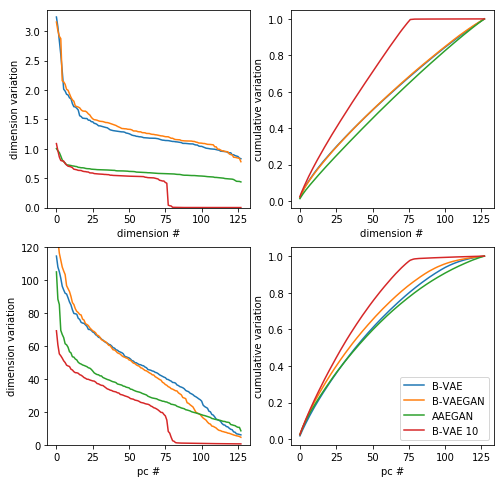

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA


model_dict = {'B-VAE': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-07-17:37:42',
             'B-VAEGAN': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvaegan/2018-07-12-20:54:37',
             'AAEGAN': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_aaegan/2018-07-13-22:33:39',
             'B-VAE 10': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-25-22:11:39'}


def plot_dim_variation(embeddings, legend_name = None):
    var_dims = np.sort(np.var(embeddings.numpy(), axis=0))[::-1]

    pca = PCA()
    pca.fit(embeddings)
    pca_var_dims = pca.singular_values_
    

    plt.subplot(2, 2, 1)
    plt.plot(var_dims, label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('dimension variation')
    plt.ylim(0)


    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(var_dims)/np.sum(var_dims), label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('cumulative variation')
    
    plt.subplot(2, 2, 3)
    plt.plot(pca_var_dims, label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('dimension variation')
    plt.ylim(0)

    plt.subplot(2, 2, 4)
    plt.plot(np.cumsum(pca_var_dims)/np.sum(pca_var_dims), label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('cumulative variation')
    plt.legend()
    
plt.figure(figsize=(8, 8))    

for name in model_dict:
    model_path = model_dict[name]
    embeddings = torch.load(os.path.join(model_path, 'ref_model/embeddings.pkl'))
    plot_dim_variation(embeddings['test'], legend_name = name)



Results from integrated cell version of "Understanding disentangling in β-VAE"

We decrease the KL loss as a function of iteration

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import glob
from natsort import natsorted
from matplotlib import cm
import pickle


def plot_dim_variation(embedding_paths, figsize = (8, 4)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    colors = cm.viridis(np.linspace(0,1, len(embedding_paths)))
    
    for path, color in zip(embedding_paths, colors):
        embeddings = pickle.load(open(path, 'rb'))
        
        var_dims = np.sort(np.var(embeddings, axis=0))[::-1]
        ax1.plot(var_dims, color = color)
        ax1.set_xlabel('dimension #')
        ax1.set_ylabel('dimension variation')
        ax1.set_ylim(0, 1.05)

        ax2.plot(np.cumsum(var_dims)/np.sum(var_dims), color = color)
        ax2.set_xlabel('dimension #')
        ax2.set_ylabel('cumulative variation')

    fig.tight_layout()


        

<Figure size 432x288 with 0 Axes>

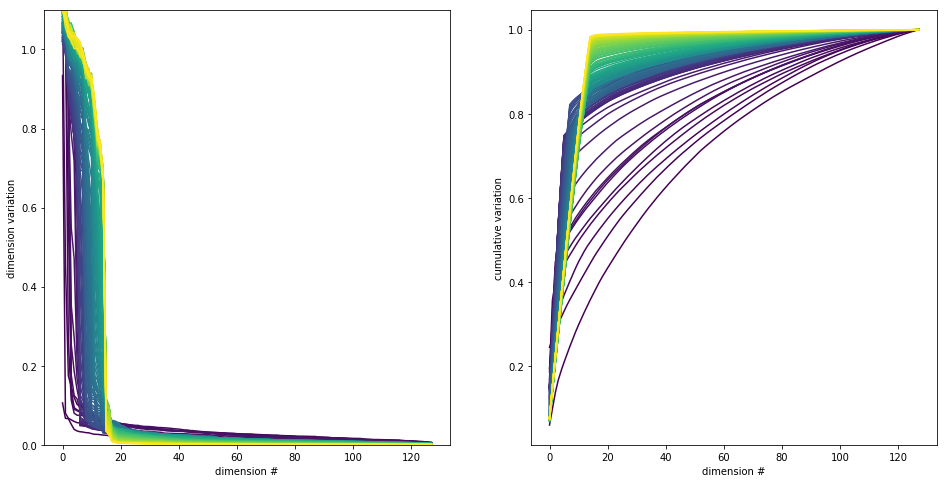

In [27]:

model_dict = {'B-VAE': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-01-19:12:51'}

for name in model_dict:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    model_path = model_dict[name]
    
    embedding_paths = natsorted(glob.glob(os.path.join(model_path, 'ref_model/embedding_*.pkl')))


{'c_max': 25, 'gamma': 1000, 'objective': 'B'}
{'betas': [0.9, 0.999]}
{'c_max': 25, 'gamma': 1000, 'objective': 'B'}
{'betas': [0.5, 0.9]}
{'c_max': 25, 'gamma': 25000.0, 'objective': 'B'}
{'betas': [0.9, 0.999]}
{'c_max': 25, 'gamma': 10000000.0, 'objective': 'B'}
{'betas': [0.9, 0.999]}
{'c_max': 25, 'gamma': 25000.0, 'objective': 'B'}
{'betas': [0.5, 0.9]}
{'c_max': 25, 'gamma': 25000.0, 'objective': 'B'}
{'betas': [0.9, 0.999]}
{'c_max': 0, 'gamma': 25000.0, 'objective': 'B'}
{'betas': [0.9, 0.999]}
{'c_max': 0, 'gamma': 50000.0, 'objective': 'B'}
{'betas': [0.9, 0.999]}
{'c_max': 0, 'objective': 'B'}
{'betas': [0.9, 0.999]}
{'beta': 25, 'objective': 'B'}
{'betas': [0.9, 0.999]}


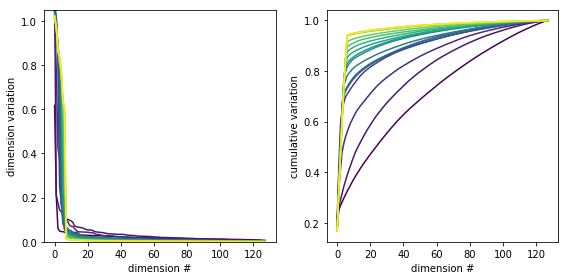

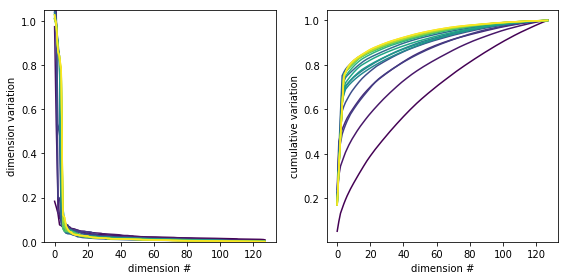

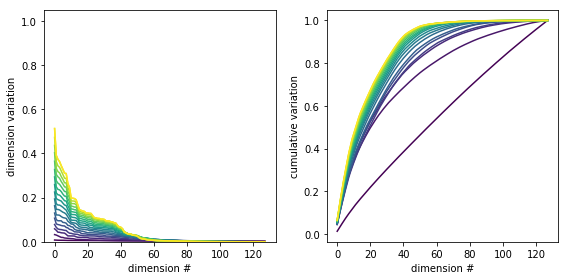

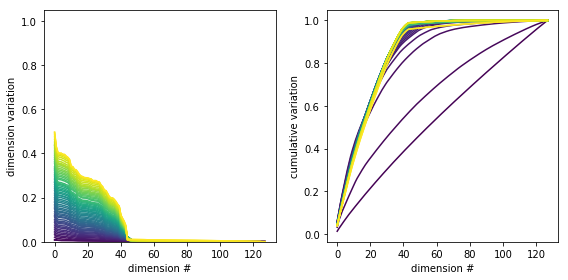

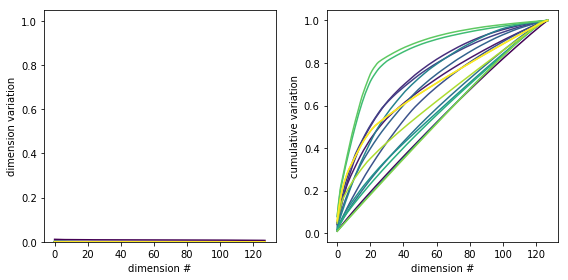

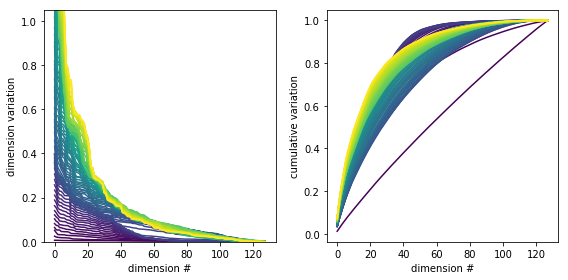

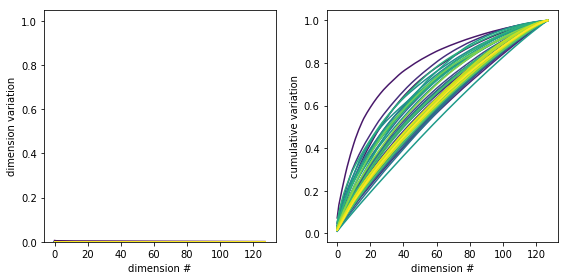

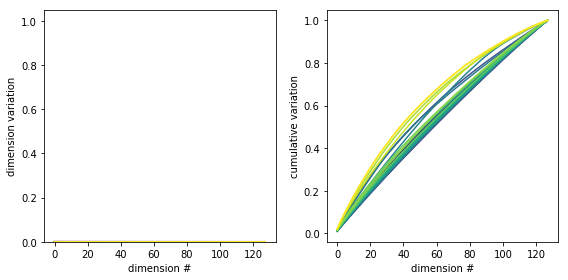

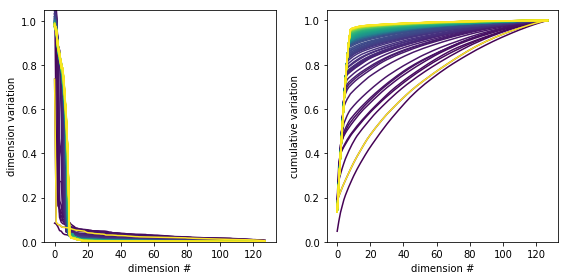

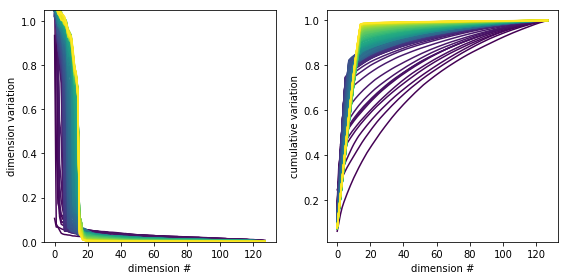

In [58]:
import pdb

model_paths = glob.glob('/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/*/')

model_paths.sort(key=os.path.getmtime, reverse=True)

for i, model_path in enumerate(model_paths):
    embedding_paths = natsorted(glob.glob(os.path.join(model_path, 'ref_model/embedding_*.pkl')))
    
    if len(embedding_paths) == 0: continue
    opt = pickle.load( open(os.path.join(model_path, 'ref_model/opt.pkl'), "rb" ))

    if ('objective' in opt.kwargs_model) and (opt.kwargs_model['objective'] == 'B'):
        print(opt.kwargs_model)
        print(opt.kwargs_optim)
        plot_dim_variation(embedding_paths)



In [45]:
embedding_paths is None

False